In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import hvplot.pandas
from scipy.stats import linregress
import seaborn as sns

from api_keys import bea_key


In [85]:
#Create variables for the API call
base_url = 'https://apps.bea.gov/api/data'
year_range = '1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023'
tablename = 'CAINC30'
linecode = '240'
year = 'ALL'
#Create URL to Bureau of Economic Analysis for per capita income by county by year
county_url = f'{base_url}?&UserID={bea_key}&method=GetData&datasetname=Regional&TableName={tablename}&LineCode={linecode}&Year={year_range}&GeoFips=COUNTY&ResultFormat=json'
#Pull the response into the notebook
county_json = requests.get(county_url).json()
county_json
#Display the result as a dataframe with 'json_normalize()' using only relevant columns 
json_df = pd.json_normalize(county_json['BEAAPI']['Results']['Data'])
jobs_json_df = json_df[['GeoFips','GeoName','TimePeriod','DataValue']]
#Format columns to match 'hpi_df' dataframe so that it can be merged later.
jobs_json_df = jobs_json_df.rename(columns={'GeoFips':'FIPS code','TimePeriod':'Year','GeoName':'County & State','DataValue':'Total Jobs'})

#Save new csv to avoid long run time of above code 
jobs_json_df.to_csv('test/jobs_data.csv',index=False)

In [86]:

county_url

'https://apps.bea.gov/api/data?&UserID=BFF7B6EF-AB3E-4409-80A8-BE25829CFDB1&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=240&Year=1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023&GeoFips=COUNTY&ResultFormat=json'

In [87]:
#Re-Upload new merged csv to notebook
jobs_df = pd.read_csv('test/jobs_data.csv')
jobs_df

,FIPS code,County & State,Year,Total Jobs
0,1001,"Autauga, AL",1982,9133
1,1001,"Autauga, AL",1981,9636
2,1001,"Autauga, AL",2005,17404
3,1001,"Autauga, AL",2020,18615
4,1001,"Autauga, AL",1992,12099
...,...,...,...,...
135015,56045,"Weston, WY",2002,3663
135016,56045,"Weston, WY",2015,4093
135017,56045,"Weston, WY",2011,3774
135018,56045,"Weston, WY",2013,3922


In [5]:
hurricane_hpi_income_df = pd.read_csv('Output_CSVs/hurricane_hpi_income_data.csv')

hpi_df = pd.read_csv('Output_CSVs/clean_new_hpi_income.csv')
hpi_df['FIPS code'] = hpi_df['FIPS code'].astype(str)
hpi_df['FIPS code'] = hpi_df['FIPS code'].apply(lambda x: x.zfill(5))

In [6]:
#Calculate mean annual HPI change for counties affect by hurricanes
prev_ac = hurricane_hpi_income_df['Annual HPI Change (%) -1'].mean()
ac = hurricane_hpi_income_df['Annual HPI Change (%)'].mean()
ac1 = hurricane_hpi_income_df['Annual HPI Change (%) +1'].mean()
ac2 = hurricane_hpi_income_df['Annual HPI Change (%) +2'].mean()
ac3 = hurricane_hpi_income_df['Annual HPI Change (%) +3'].mean()
print(prev_ac,ac,ac1,ac2,ac3)

6.243939393939394 8.85121212121212 10.72090909090909 5.245454545454545 0.4715151515151513


In [7]:
#Calculate mean annual HPI change for the whole nation
state_prev_ac = hurricane_hpi_income_df['State HPI AC Mean -1'].mean()
state_ac = hurricane_hpi_income_df['State HPI AC Mean'].mean()
state_ac1 = hurricane_hpi_income_df['State HPI AC Mean +1'].mean()
state_ac2 = hurricane_hpi_income_df['State HPI AC Mean +2'].mean()
state_ac3 = hurricane_hpi_income_df['State HPI AC Mean +3'].mean()
print(state_prev_ac,state_ac,state_ac1,state_ac2,state_ac3)

4.967431187133294 7.284536684564057 7.9273024940587895 4.881826044204389 2.190202628102282


In [8]:
#Calculate mean annual HPI change for the whole nation
nat_prev_ac = hurricane_hpi_income_df['National HPI AC Mean -1'].mean()
nat_ac = hurricane_hpi_income_df['National HPI AC Mean'].mean()
nat_ac1 = hurricane_hpi_income_df['National HPI AC Mean +1'].mean()
nat_ac2 = hurricane_hpi_income_df['National HPI AC Mean +2'].mean()
nat_ac3 = hurricane_hpi_income_df['National HPI AC Mean +3'].mean()
print(nat_prev_ac,nat_ac,nat_ac1,nat_ac2,nat_ac3)

3.311242678435616 4.50395764281475 4.862542505308011 4.195585864143484 3.3413840291104404


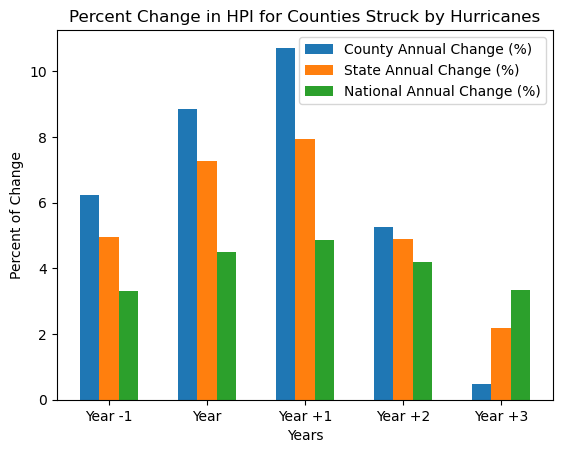

In [9]:
bars = ['Year -1','Year','Year +1','Year +2','Year +3']
acs = [prev_ac,ac,ac1,ac2,ac3]
state_acs = [state_prev_ac,state_ac,state_ac1,state_ac2,state_ac3]
nat_acs = [nat_prev_ac,nat_ac,nat_ac1,nat_ac2,nat_ac3]

x_axis = np.arange(len(bars)) 
  
plt.bar(x_axis - 0.2, acs, 0.2, label = 'County Annual Change (%)') 
plt.bar(x_axis - 0.0, state_acs, 0.2, label = 'State Annual Change (%)') 
plt.bar(x_axis + 0.2, nat_acs, 0.2, label = 'National Annual Change (%)') 
  
plt.xticks(x_axis, bars) 
plt.xlabel("Years") 
plt.ylabel("Percent of Change") 
plt.title("Percent Change in HPI for Counties Struck by Hurricanes") 
plt.legend() 
plt.show() 

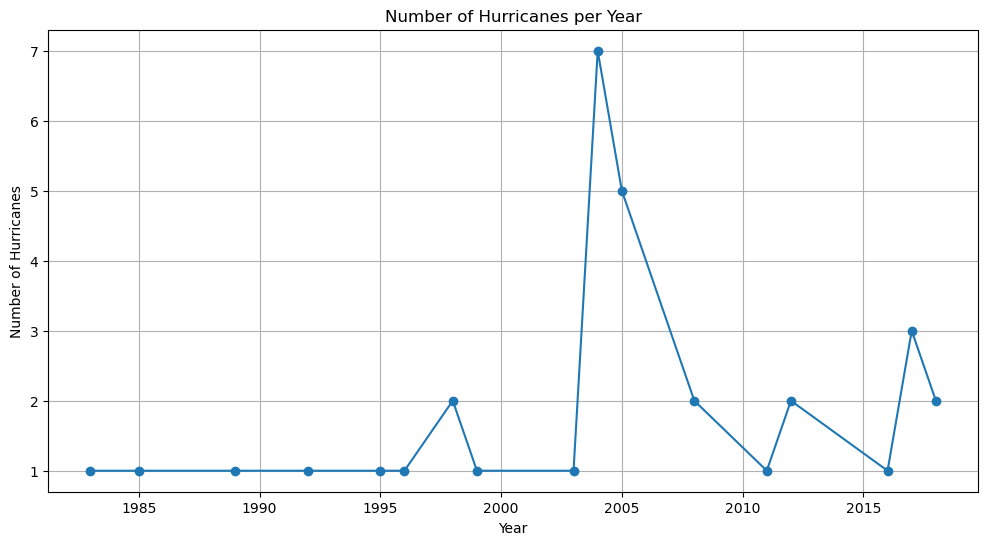

In [10]:

# Load the data
#df = pd.read_csv('clean_hurricane_income_data.csv')

# Group by Year and count the number of hurricanes
hurricane_counts = hurricane_hpi_income_df.groupby('Year').size()

# Plot
plt.figure(figsize=(12, 6))
hurricane_counts.plot(kind='line', marker='o')
plt.title('Number of Hurricanes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.grid()
plt.show()

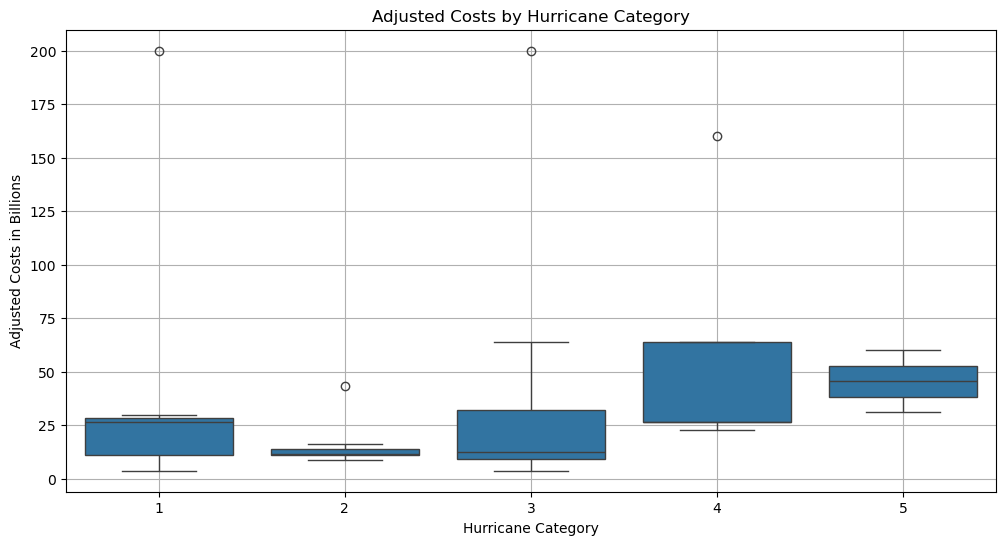

In [13]:
# Boxplot of Adjusted Costs by Hurricane Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category at Landfall', y='Adjusted Costs (Billions)', data=hurricane_hpi_income_df)
plt.title('Adjusted Costs by Hurricane Category')
plt.xlabel('Hurricane Category')
plt.ylabel('Adjusted Costs in Billions')
plt.grid()
plt.show()

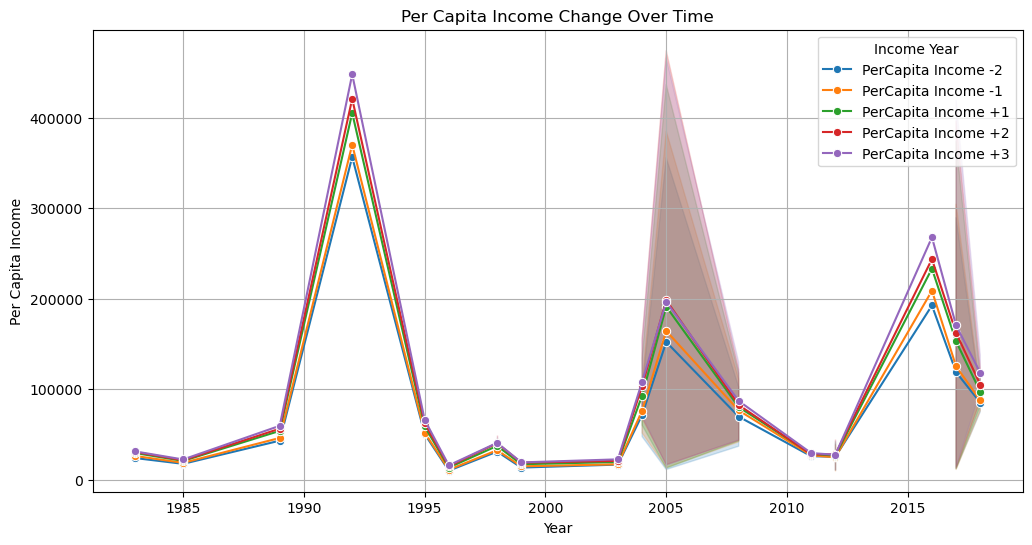

In [14]:

# Melt the DataFrame to long format for easier plotting
income_columns = ['PerCapita Income -2', 'PerCapita Income -1', 'PerCapita Income +1', 'PerCapita Income +2', 'PerCapita Income +3']
income_data = hurricane_hpi_income_df.melt(id_vars=['County', 'State', 'Year'], value_vars=income_columns, var_name='Income Year', value_name='Per Capita Income')
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=income_data, x='Year', y='Per Capita Income', hue='Income Year', marker='o')
plt.title('Per Capita Income Change Over Time')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.grid()
plt.show()

In [15]:
# Calculate correlation matrix
correlation_matrix = hurricane_hpi_income_df.corr()
# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Alicia'

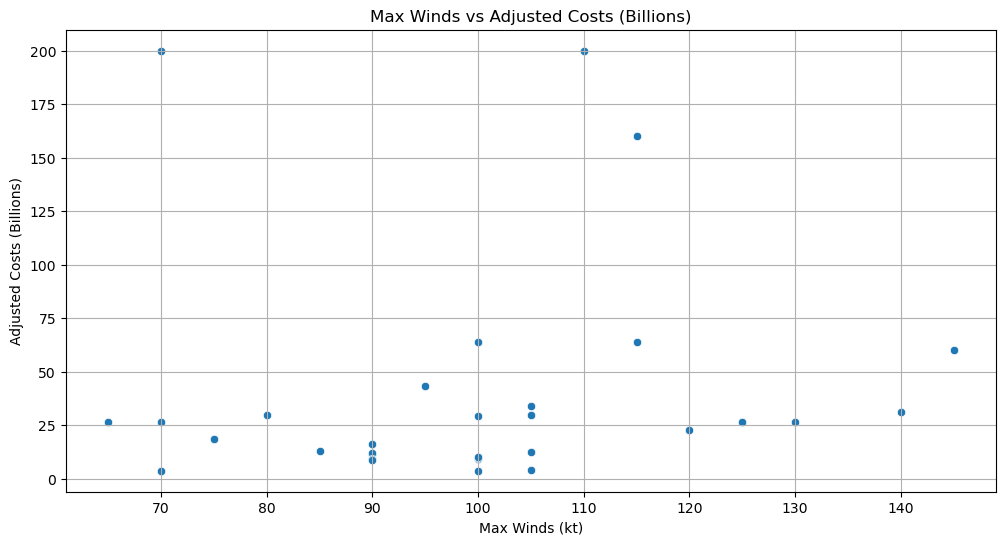

In [16]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Max Winds (kt)', y='Adjusted Costs (Billions)', data=hurricane_hpi_income_df)
plt.title('Max Winds vs Adjusted Costs (Billions)')
plt.xlabel('Max Winds (kt)')
plt.ylabel('Adjusted Costs (Billions)')
plt.grid()
plt.show()

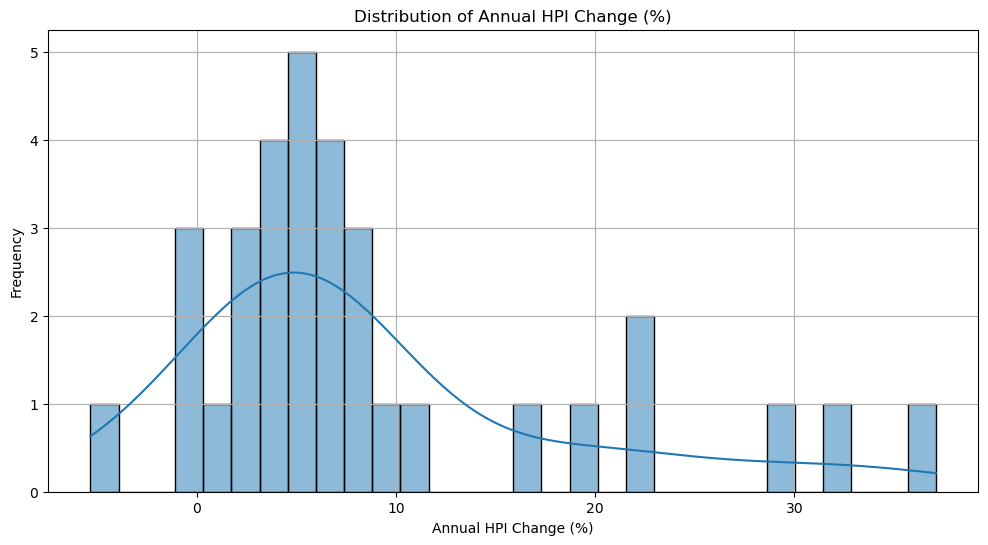

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(hurricane_hpi_income_df['Annual HPI Change (%)'], bins=30, kde=True)
plt.title('Distribution of Annual HPI Change (%)')
plt.xlabel('Annual HPI Change (%)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

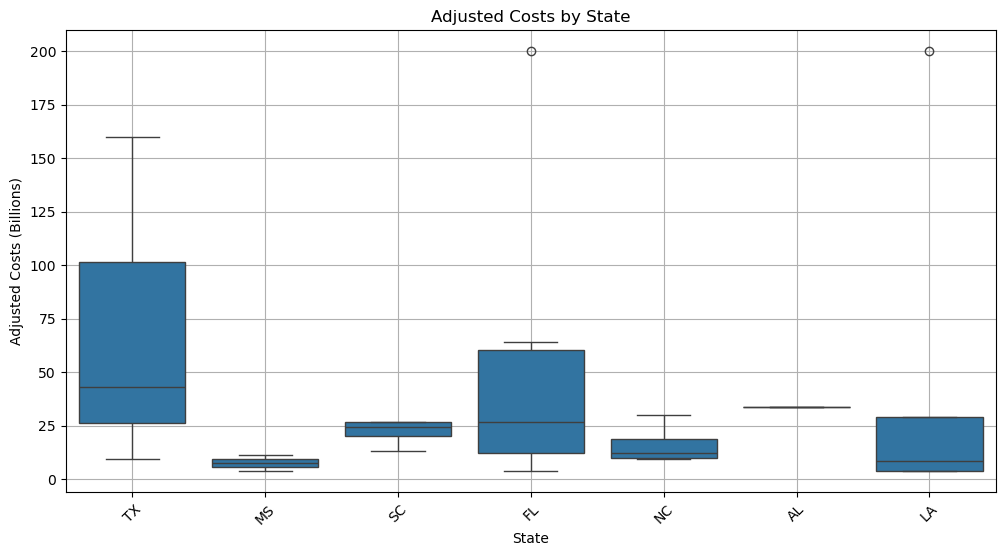

In [18]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Adjusted Costs (Billions)', data=hurricane_hpi_income_df)
plt.title('Adjusted Costs by State')
plt.xlabel('State')
plt.ylabel('Adjusted Costs (Billions)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Axes: xlabel='Year', ylabel='Annual Income Change'>

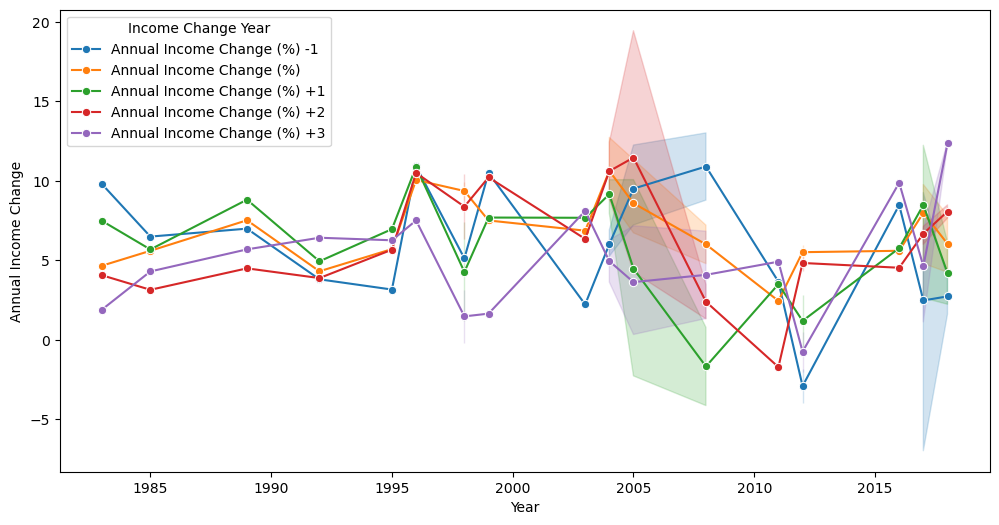

In [19]:
income_change_columns = ['Annual Income Change (%) -1', 'Annual Income Change (%)', 'Annual Income Change (%) +1', 'Annual Income Change (%) +2', 'Annual Income Change (%) +3']
income_change_data = hurricane_hpi_income_df.melt(id_vars=['County', 'State', 'Year'], value_vars=income_change_columns, var_name='Income Change Year', value_name='Annual Income Change')
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=income_change_data, x='Year', y='Annual Income Change', hue='Income Change Year', marker='o')

In [20]:
by_nation = hpi_df.groupby(['Year'])
change_by_nation = by_nation['Annual HPI Change (%)'].agg(['mean','median'])
change_by_nation

,mean,median
Year,,
1983,7.281257,5.610
1984,3.685160,3.405
1985,3.419117,3.330
1986,4.337633,3.585
1987,3.508740,3.005
1988,3.799332,3.880
1989,4.570361,4.130
1990,3.346552,2.820
1991,2.864474,2.755


In [21]:
by_state = hpi_df.groupby(['State','Year'])
change_by_state = by_state['Annual HPI Change (%)'].agg(['mean','median'])
change_by_state

mean  median
State Year                   
AK    1983   8.110000   8.110
      1984   4.180000   4.180
      1985  -5.760000  -5.760
      1986  -5.134000  -3.670
      1987 -16.603333 -16.505
...               ...     ...
WY    2015   2.755455   2.520
      2016   3.335909   2.940
      2017   1.372273   1.225
      2018   3.183182   2.735
      2019   3.885000   3.795

[1887 rows x 2 columns]

In [22]:
merged_df = pd.merge(hpi_df,change_by_nation,on = ['Year'],how='outer')
merged_df2 = pd.merge(merged_df,change_by_state,on=['Year','State'],how='outer')
clean_merged = merged_df2.rename(columns={'mean_x':'National Mean','median_x':'National Median',
                                          'mean_y':'State Mean','median_y':'State Median'})
clean_merged

,State,County,FIPS code,Year,Annual HPI Change (%),HPI,County & State,PerCapita Income,Year -2,Year -1,...,State HPI AC Mean +3,State Income AC Mean,State Income AC Mean -1,State Income AC Mean +1,State Income AC Mean +2,State Income AC Mean +3,National Mean,National Median,State Mean,State Median
0,AK,Anchorage,02020,1983,8.11,225.95,"Anchorage Municipality, AK",46518.69,1981.0,1982.0,...,-5.134000,9.710968,23.763363,8.277082,6.293637,-0.609627,7.281257,5.61,8.110,8.110
1,AL,Baldwin,01003,1983,30.91,138.04,"Baldwin, AL",8446.81,1981.0,1982.0,...,5.067273,8.689154,6.349759,11.074696,8.454890,6.384419,7.281257,5.61,7.460,5.370
2,AL,Calhoun,01015,1983,10.84,144.33,"Calhoun, AL",12193.67,1981.0,1982.0,...,5.067273,8.689154,6.349759,11.074696,8.454890,6.384419,7.281257,5.61,7.460,5.370
3,AL,Etowah,01055,1983,-7.98,104.23,"Etowah, AL",9864.43,1981.0,1982.0,...,5.067273,8.689154,6.349759,11.074696,8.454890,6.384419,7.281257,5.61,7.460,5.370
4,AL,Jefferson,01073,1983,5.35,155.91,"Jefferson, AL",76684.98,1981.0,1982.0,...,5.067273,8.689154,6.349759,11.074696,8.454890,6.384419,7.281257,5.61,7.460,5.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76702,WY,Sweetwater,56037,2019,1.27,544.73,"Sweetwater, WY",23698.55,2017.0,2018.0,...,22.362000,3.734617,5.948487,6.947032,6.243123,4.160715,4.480984,4.43,3.885,3.795
76703,WY,Teton,56039,2019,9.42,1056.36,"Teton, WY",60437.99,2017.0,2018.0,...,22.362000,3.734617,5.948487,6.947032,6.243123,4.160715,4.480984,4.43,3.885,3.795
76704,WY,Uinta,56041,2019,4.16,248.10,"Uinta, WY",8317.83,2017.0,2018.0,...,22.362000,3.734617,5.948487,6.947032,6.243123,4.160715,4.480984,4.43,3.885,3.795
76705,WY,Washakie,56043,2019,6.05,259.90,"Washakie, WY",3713.75,2017.0,2018.0,...,22.362000,3.734617,5.948487,6.947032,6.243123,4.160715,4.480984,4.43,3.885,3.795


In [ ]:
by_state = hpi_df_csv.groupby(['State','Year'])
change_by_state = by_state['Annual Change (%)'].agg(['mean'])
change_by_state = change_by_state.reset_index(level=1)
change_by_state

In [ ]:
prev_mean_state = []
mean_state_1 = []
mean_state_2 = []
mean_state_3 = []

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index-1]
        prev_mean_state.append(value2)
    except:
        prev_mean_state.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+1,'mean']
        mean_state_1.append(value2)
    except:
        mean_state_1.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+2,'mean']
        mean_state_2.append(value2)
    except:
        mean_state_2.append('')

for index in change_by_state.index:
    try:
        value2 = change_by_state.at[index+3,'mean']
        mean_state_3.append(value2)
    except:
        mean_state_3.append('')

change_by_state['State AC Mean -1'] = prev_mean_state
change_by_state['State AC Mean +1'] = mean_state_1
change_by_state['State AC Mean +2'] = mean_state_2
change_by_state['State AC Mean +3'] = mean_state_3
change_by_state